In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - run_linear_model_bar.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1501
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Use the linear model to find the amplitudes of different bar models.
'''

__author__ = "James Lane"

In [2]:
# General
import numpy as np
import pdb, sys, importlib, copy, importlib
from tqdm import tqdm_notebook

## Plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm

## Astropy
from astropy import units as apu
from astropy.io import fits
from astropy.table import Table

## Galpy

## Add project-specific package. Assume relative location
sys.path.append('../../src/')
import ast1501.util
import ast1501.fourier
import ast1501.df
import ast1501.linear_model

In [3]:
### Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Debugging, automatically drop in during error
# %pdb
from IPython.core.debugger import set_trace

In [4]:
matplotlib.rc('text', usetex=True)

# Meta

## Information:

## Future Work:

Use the new ```LinearModel``` class to examine the $m=2$ amplitudes of long-slow bar models.

# Prepare

## Load Gaia DR2 Data

In [5]:
### Load catalogs
gaiadr2_apogee_catalog = '../../data/generated/gaiadr2-apogee_dr14_dataset.FIT'
f = fits.open(gaiadr2_apogee_catalog)
data = f[1].data

### Cut on galactocentric absolute Z < 0.3 kpc
where_low_z = np.where( np.abs(data['Z']) < 0.3 )[0]
data_low_z = data[where_low_z] 
z_select_text = r'$|$Z$_{GC}| < 0.3$ kpc'

### Read catalog values

# ID, RA, Dec, logg, abundances, errors
apid = data_low_z['APOGEE_ID']
locid = data_low_z['LOCATION_ID']
vhelio = data_low_z['VHELIO']
pmll = data_low_z['PM_LL']
pmbb = data_low_z['PM_BB']
gc_x = data_low_z['X']
gc_y = data_low_z['Y']
gc_z = data_low_z['Z']
gc_vx = data_low_z['VX']
gc_vy = data_low_z['VY']
gc_vz = data_low_z['VZ']

### Convert to galactocentric radius and radial velocity
gc_R = np.sqrt(np.square(gc_x)+np.square(gc_y))
gc_phi = np.arctan2(gc_y,gc_x)
gc_vR = np.cos(gc_phi)*gc_vx + np.sin(gc_phi)*gc_vy
gc_vT = np.sin(gc_phi)*gc_vx - np.cos(gc_phi)*gc_vy
gc_phi = np.arctan2(gc_y,-gc_x)

## Set Parameters

In [6]:
# Radial bin range and size
R_lim = [12,15]
R_bin_size = 0.75
R_bin_cents = np.arange( R_lim[0], R_lim[1], R_bin_size ) + R_bin_size/2

# Phi bin range and size
phi_lim = [-np.pi/2, np.pi/2]
phi_bin_size = np.pi/30
phi_bin_cents = np.arange( phi_lim[0], phi_lim[1], phi_bin_size ) + phi_bin_size/2

# Phib bin range and size
phib_lim = [-np.pi/4, np.pi/4]
phib_bin_size = np.pi/60
phib_bin_cents = np.arange( phib_lim[0], phib_lim[1], phib_bin_size ) + phib_bin_size/2


# Check out the original LinearModel

In [134]:
importlib.reload(ast1501.linear_model)

<module 'ast1501.linear_model' from '../../src/ast1501/linear_model.py'>

In [138]:
lm_th = ast1501.linear_model.LinearModel(instantiate_method=2, 
        df_filename='../../scripts/generate_triaxial_df/2019-03-30/data0.npy', 
        phib_bin_size=phib_bin_size,
        phib_lims=phib_lim,
        force_yint_vR=True,
        use_velocities=['vR','vT'])

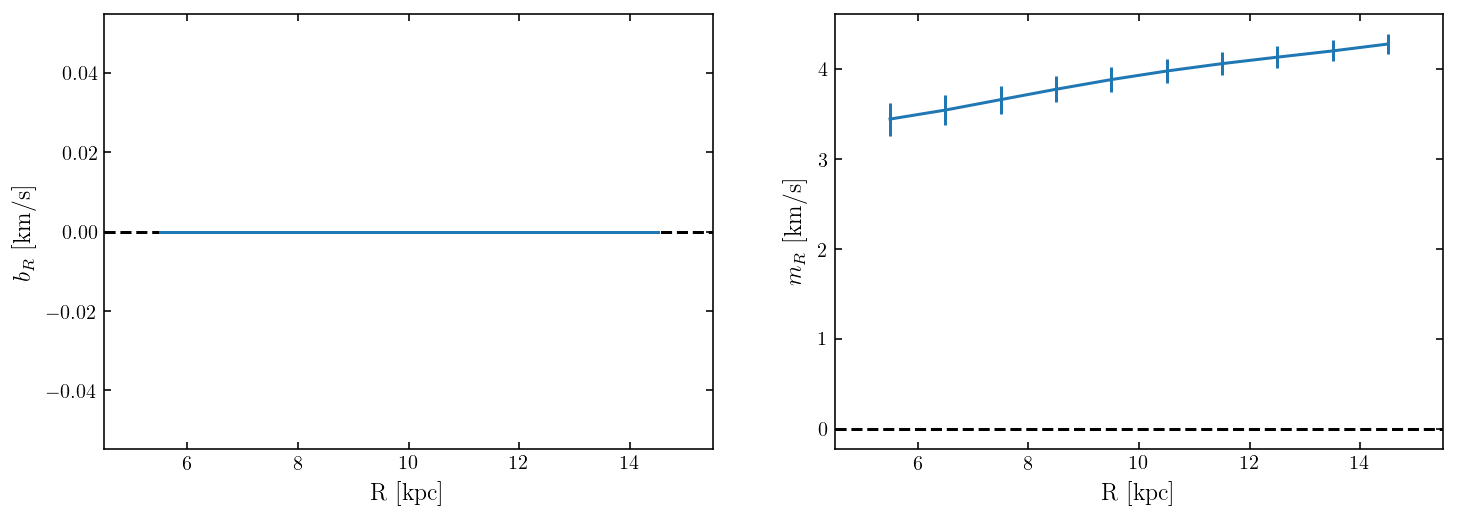

In [139]:
fig,axs = lm_th.plot_velocity_m_r(which_velocity='vR')
fig.set_facecolor('White')

# Check out the amplitudes of a triaxial halo

In [204]:
importlib.reload(ast1501.linear_model)

<module 'ast1501.linear_model' from '../../src/ast1501/linear_model.py'>

In [209]:
lm_th = ast1501.linear_model.LinearModel2(instantiate_method=2, 
        df_filename='../../scripts/generate_triaxial_df/2019-03-30/data0.npy', 
        phib_bin_size=phib_bin_size,
        phib_lims=phib_lim,
        force_yint_vR=False,
        use_velocities=['vT'])

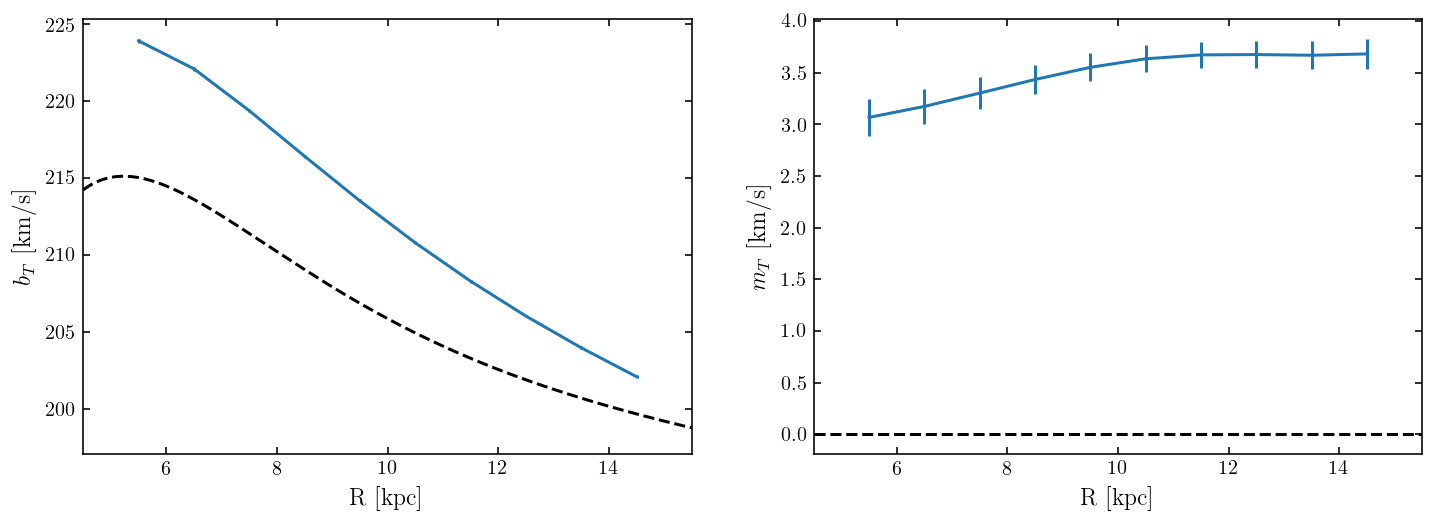

In [211]:
fig,axs = lm_th.plot_velocity_m_r(which_velocity='vT')
fig.set_facecolor('White')

# Check out the amplitudes of a bar

In [7]:
importlib.reload(ast1501.linear_model)

<module 'ast1501.linear_model' from '../../src/ast1501/linear_model.py'>

In [8]:
lm_lsb = ast1501.linear_model.LinearModel(instantiate_method=2, 
        df_filename='../../scripts/generate_lsbar_df/2019-05-27/data.npy', 
        phib_bin_size=phib_bin_size,
        phib_lims=phib_lim)

../../src/ast1501/linear_model.py:942: RuntimeWarning: divide by zero encountered in log
  likelihood_vT[j,:] = np.log(lin_likelihood_vT)

../../src/ast1501/linear_model.py:948: RuntimeWarning: divide by zero encountered in log
  likelihood_vR[j,:] = np.log(lin_likelihood_vR)

